In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
6/25/20        2684   29037      15619       2170         5336     15366   
6/26/20        2836   29905      15828       2170         5517     15994   
6/27/20        2979   30658      16397       2170         5727     17007   
6/28/20        3130   31686      16930       2170         5934     18082   
6/29/20        3269   32785      17409       2170         6173     18818   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
6/25/20               29141      684                  123  2321  
6/26/20               29764      686                  124  2325  
6/27/20               30619      690                  126  2330  
6/28/20               31373      696                  126  2332  
6/29/20               31816      698                  126  2340  

[122 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

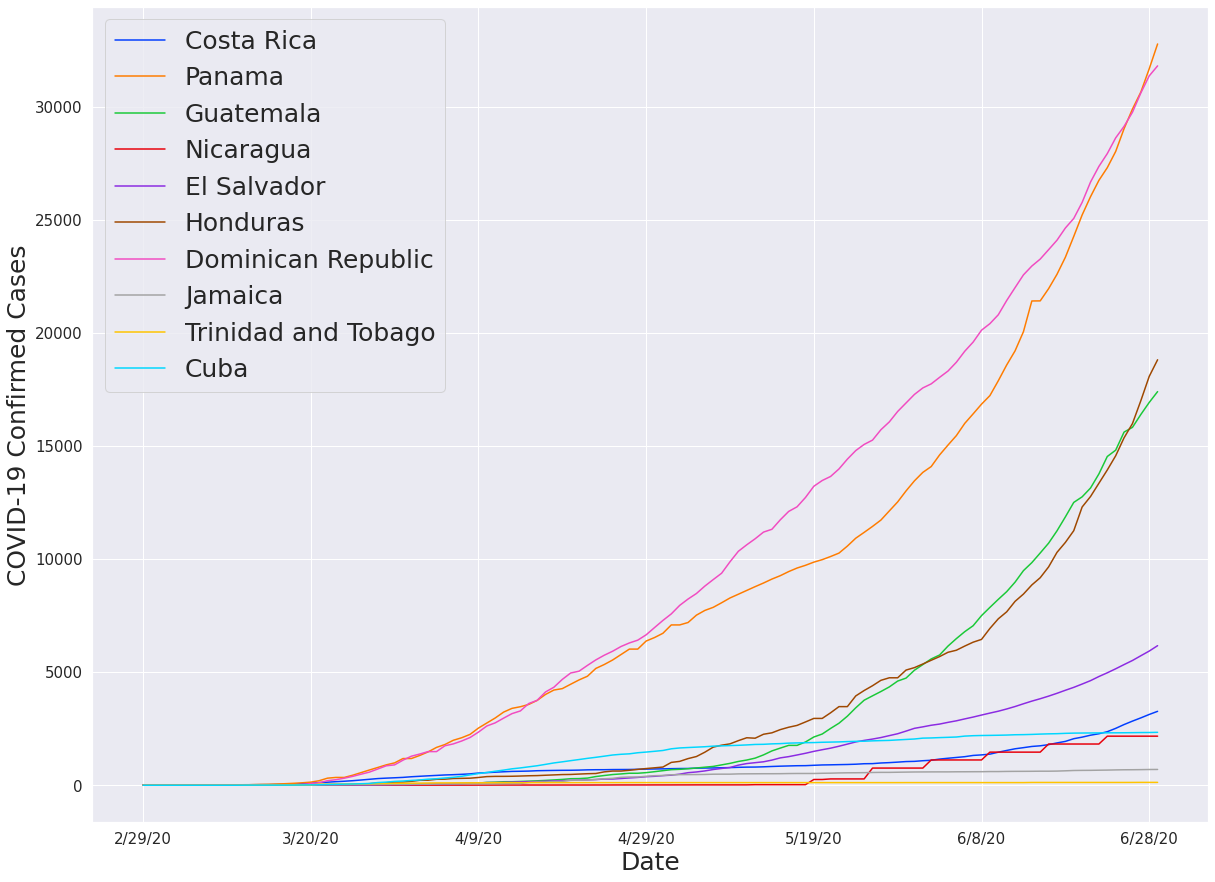

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

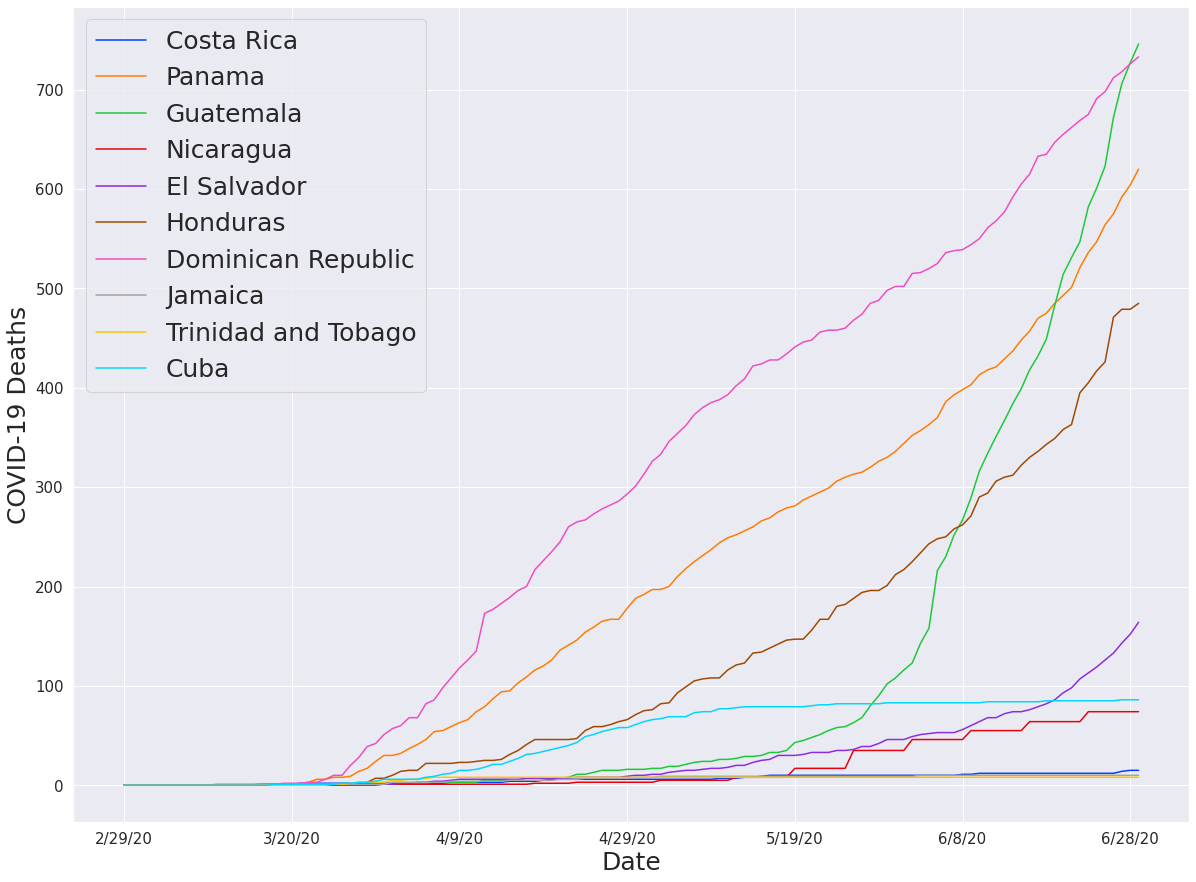

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20          0.0     0.0        0.0        0.0          0.0       0.0   
...             ...     ...        ...        ...          ...       ...   
6/25/20       169.0  1007.0      800.0        0.0        186.0     795.0   
6/26/20       152.0   868.0      209.0        0.0        181.0     628.0   
6/27/20       143.0   753.0      569.0        0.0        210.0    1013.0   
6/28/20       151.0  1028.0      533.0        0.0        207.0    1075.0   
6/29/20       139.0  1099.0      479.0        0.0        239.0     736.0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                  1.0      0.0                  0.0   0.0  
3/2/20                  0.0      0.0                  0.0   0.0  
3/3/20                  0.0      0.0                  0.0   0.0  
3/4/20                  0.0      0.0                  0.0   0.0  
3/5/20                  0.0      0.0                  0.0   0.0  
...                     ...      ...                  ...   ...  
6/25/20               510.0      6.0                  0.0   2.0  
6/26/20               623.0      2.0                  1.0   4.0  
6/27/20               855.0      4.0                  2.0   5.0  
6/28/20               754.0      6.0                  0.0   2.0  
6/29/20               443.0      2.0                  0.0   8.0  

[121 rows x 10 columns]

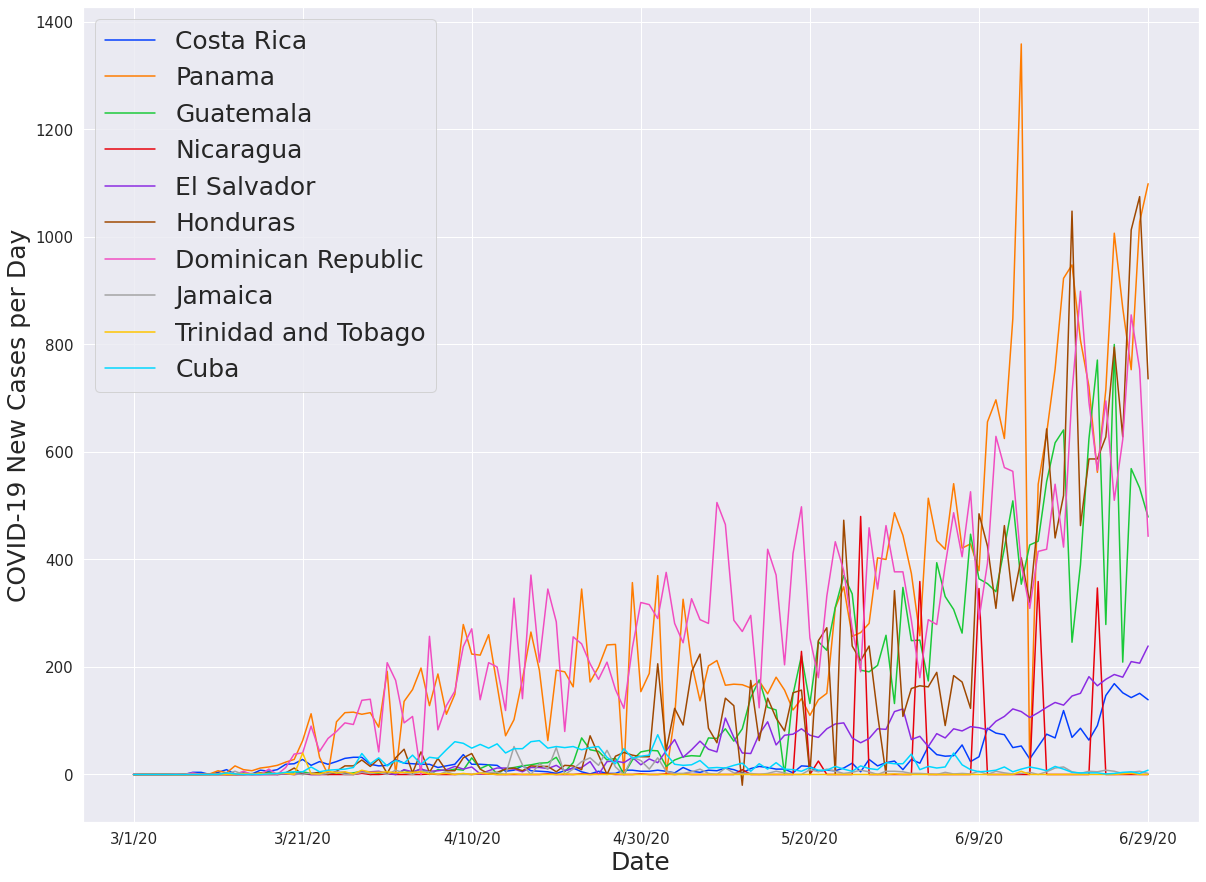

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

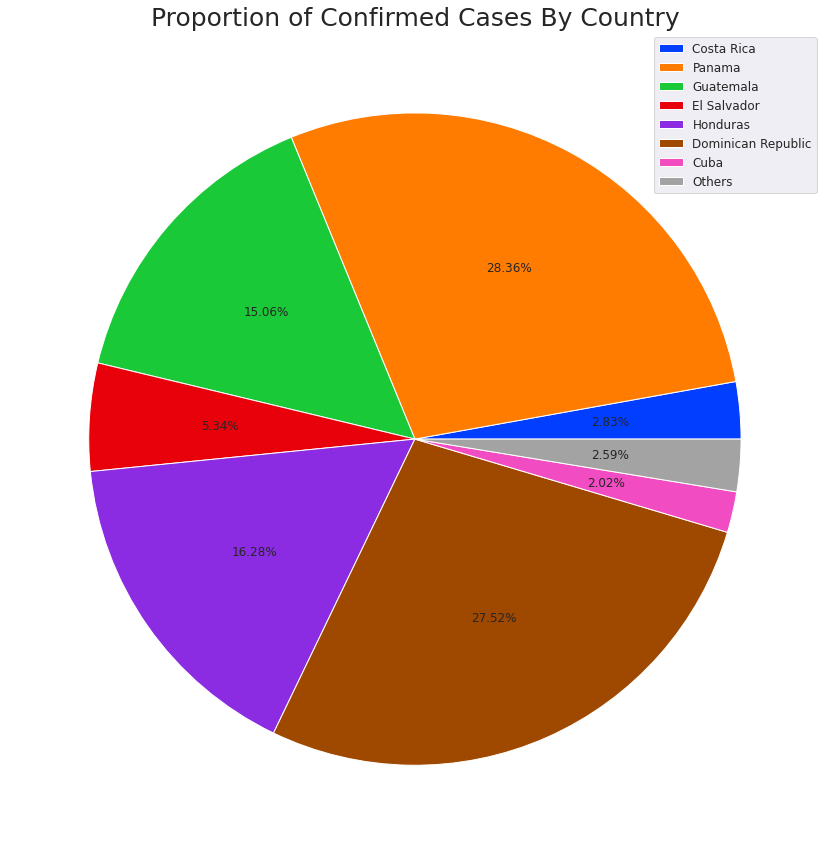

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

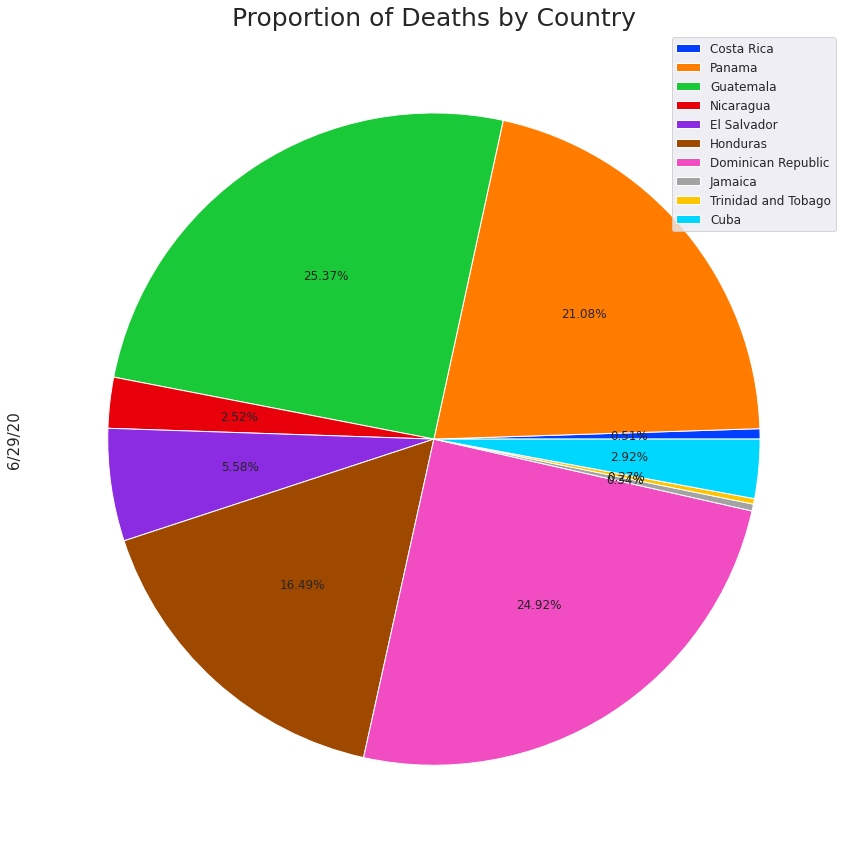

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
6/25/20    1.067197  1.035926   1.053985        1.0     1.036117  1.054560   
6/26/20    1.056632  1.029893   1.013381        1.0     1.033921  1.040869   
6/27/20    1.050423  1.025180   1.035949        1.0     1.038064  1.063336   
6/28/20    1.050688  1.033531   1.032506        1.0     1.036145  1.063209   
6/29/20    1.044409  1.034684   1.028293        1.0     1.040276  1.040703   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000             0.000000  0.000000  
3/1/20             0.000000  0.000000             0.000000  0.000000  
3/2/20             1.000000  0.000000             0.000000  0.000000  
3/3/20             1.000000  0.000000             0.000000  0.000000  
3/4/20             1.000000  0.000000             0.000000  0.000000  
...                     ...       ...                  ...       ...  
6/25/20            1.017813  1.008850             1.000000  1.000862  
6/26/20            1.021379  1.002924             1.008130  1.001723  
6/27/20            1.028726  1.005831             1.016129  1.002151  
6/28/20            1.024625  1.008696             1.000000  1.000858  
6/29/20            1.014120  1.002874             1.000000  1.003431  

[122 rows x 10 columns]

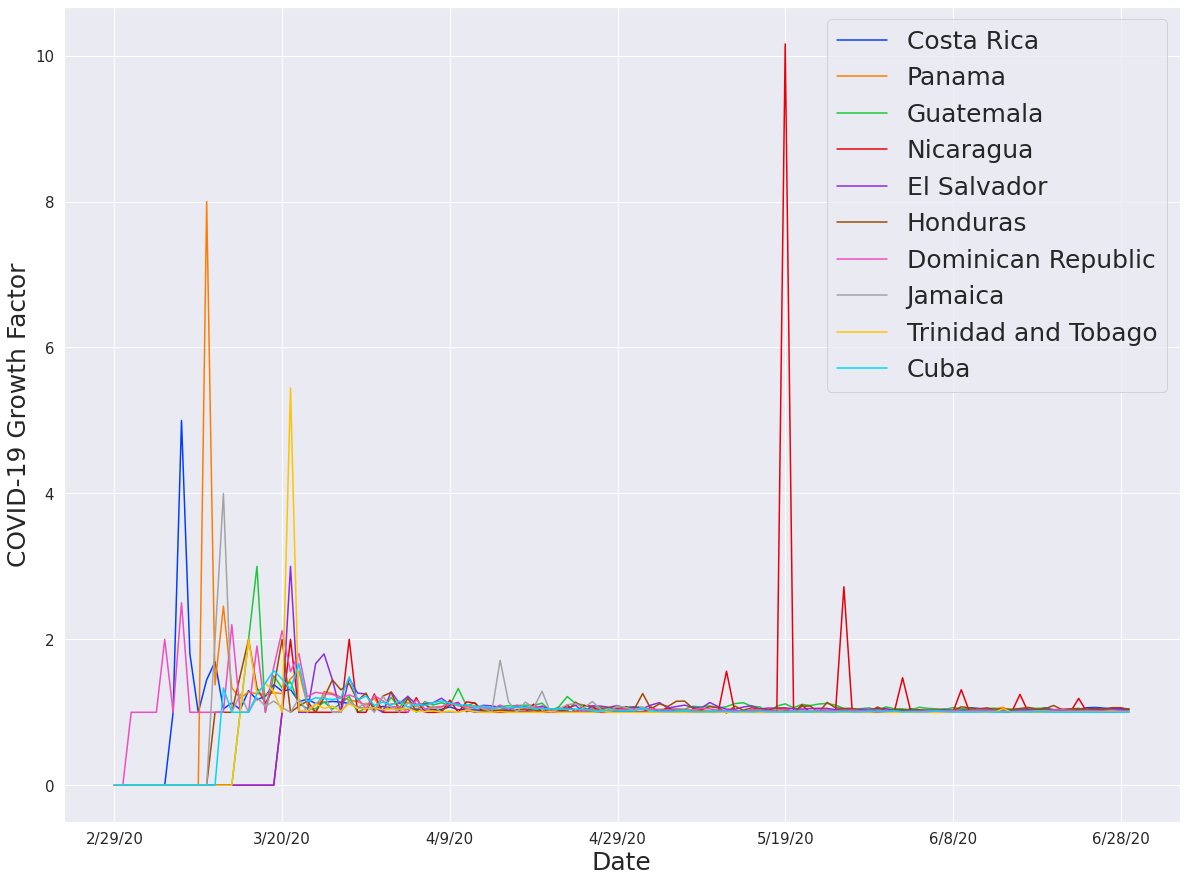

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  122.000000  122.000000  122.000000  122.000000   122.000000   
mean     1.034963    1.045581    0.971665    0.969215     0.921722   
std      0.453835    0.724519    0.418884    0.952210     0.458129   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.009385    1.019619    1.030720    1.000000     1.026383   
50%      1.027495    1.033331    1.054425    1.000000     1.039211   
75%      1.050642    1.070876    1.091925    1.000000     1.076573   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  122.000000          122.000000  122.000000           122.000000   
mean     0.987267            1.090589    0.974620             0.937324   
std      0.359161            0.283814    0.436100             0.542714   
min      0.000000            0.000000    0.000000             0.000000   
25%      1.018095            1.017721    1.000000             1.000000   
50%      1.042762            1.029283    1.007383             1.000000   
75%      1.077973            1.053739    1.058764             1.008498   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  122.000000  
mean     0.954855  
std      0.350457  
min      0.000000  
25%      1.003224  
50%      1.009751  
75%      1.066858  
max      1.666667

In [17]:
growth_df.mean()

Costa Rica             1.034963
Panama                 1.045581
Guatemala              0.971665
Nicaragua              0.969215
El Salvador            0.921722
Honduras               0.987267
Dominican Republic     1.090589
Jamaica                0.974620
Trinidad and Tobago    0.937324
Cuba                   0.954855
dtype: float64

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  115.000000  111.000000  107.000000  102.000000   102.000000   
mean     1.097961    1.149197    1.107880    1.159258     1.102452   
std      0.385794    0.676212    0.218998    0.929387     0.224109   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      1.011191    1.024347    1.044252    1.000000     1.032201   
50%      1.028634    1.034684    1.059568    1.000000     1.051595   
75%      1.051235    1.078589    1.098131    1.000000     1.086838   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  110.000000          120.000000  110.000000           107.000000   
mean     1.094968            1.108765    1.080942             1.068725   
std      0.155518            0.248156    0.308445             0.440979   
min      0.990476            1.000000    1.000000             1.000000   
25%      1.028330            1.017828    1.001990             1.000000   
50%      1.046817            1.029911    1.008857             1.000000   
75%      1.084232            1.055647    1.064627             1.008889   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  109.000000  
mean     1.068737  
std      0.121519  
min      1.000000  
25%      1.004559  
50%      1.011522  
75%      1.079032  
max      1.666667

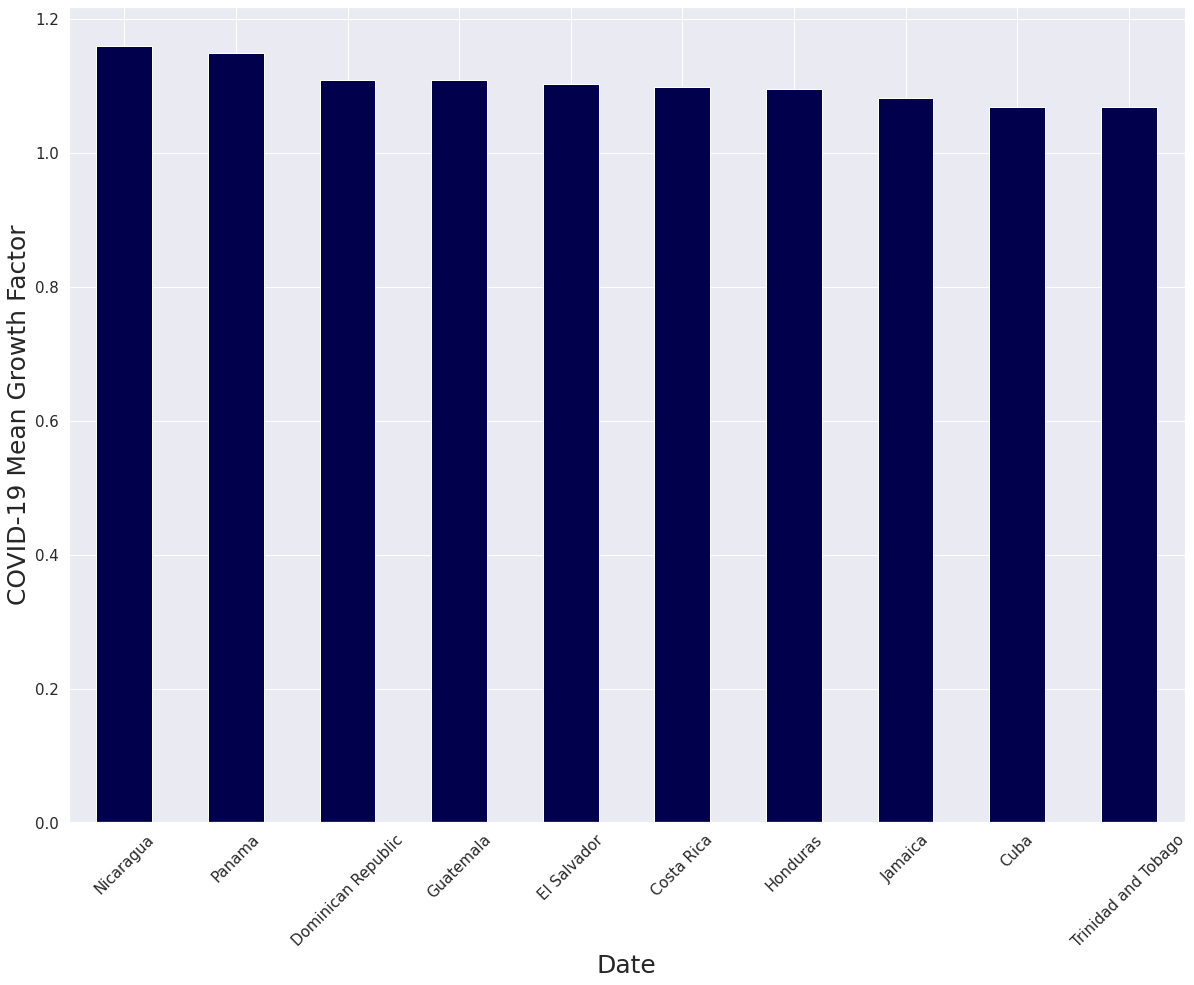

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

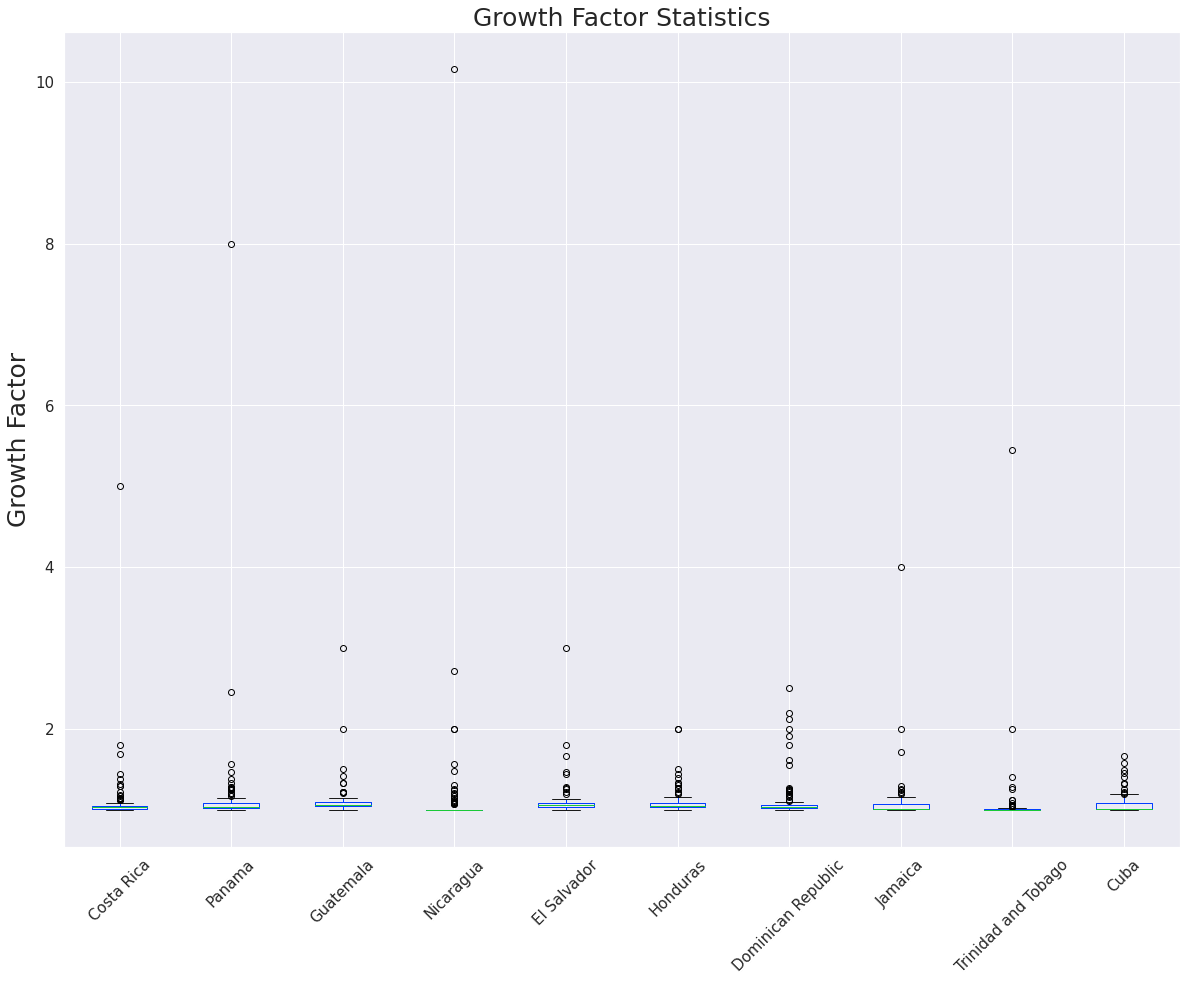

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

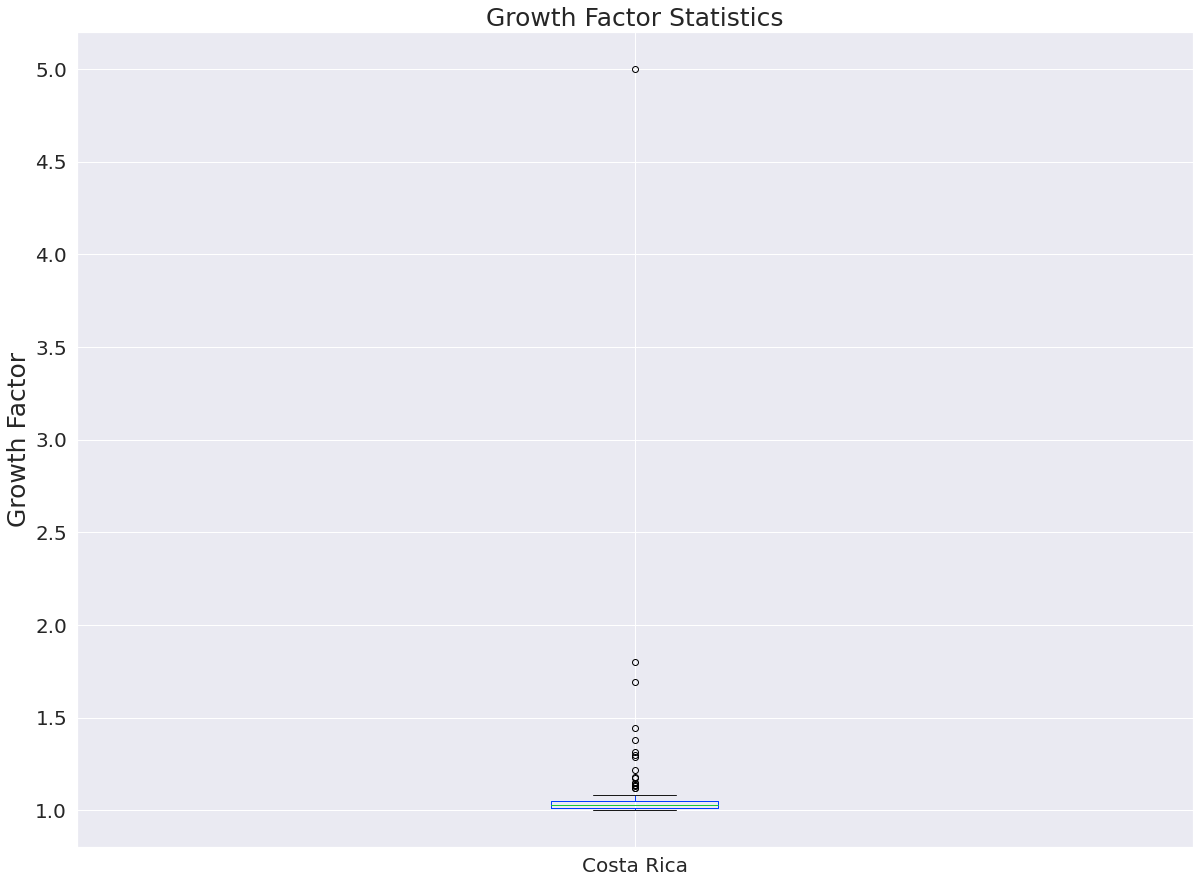

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()